<a href="https://colab.research.google.com/github/MariaFernandaGuerrero/GNURADIO_LABCOMUIS_2025_1_B1A_G5/blob/main/taller_2_comunicaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Taller #2**
- Michelle Garzón Campos - 2202785
- Juan David Camacho Gonzalez - 2210428
- Nicolas Felipe Saavedra Diaz - 2202788

**Librerías**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, correlate, welch
import scipy.stats as stats

**Datos iniciales**

In [ ]:
codigos = [2,2,0,2,7,8,5,2,2,0,2,7,8,8,2,2,1,0,4,2,8]
G = 21 # 8+8+5
a = np.median(codigos)

**Punto 1**

In [17]:

def Ruido_Gaussiano(a, G, mean, varianza):

    # Parámetros iniciales
    A = 10000  # Número de muestras
    M = 10 + G # numero de muestras de la ventana
    des = np.sqrt(varianza)

    print(f"Desviación estándar: {des}")

    x = np.random.normal(mean, des, A)

    # Ventana cuadrada de M muestras
    ventana = np.ones(M) / M  # Esta es una PDF uniforme


    # Filtrado por convolución (media móvil)
    y = np.convolve(x, ventana, mode='same')

    # Comparación de varianzas
    print(f"Varianza original: {np.var(x):.4f}")
    print(f"Varianza filtrada: {np.var(y):.4f}")

    # Visualización
    plt.figure(figsize=(10,4))
    plt.hist(y, bins=100, density=True, alpha=0.6, label="Señal filtrada")
    plt.title("Histograma señal filtrada")
    plt.legend()
    plt.grid()
    plt.show()

    # Respuesta al impulso del sistema LTI
    t = np.arange(0, 10, 0.01)
    h = np.exp(-a*t)



    # Filtrar la señal de ruido blanco
    y_LTI = lfilter(h, [1], x)

    # Calcular PSD (densidad espectral de potencia)
    f, Pxx = welch(y_LTI, fs=100)

    # Grafica PSD
    plt.figure()
    plt.semilogy(f, Pxx)
    plt.title("PSD de la salida (filtro exponencial)")
    plt.xlabel("Frecuencia (Hz)")
    plt.ylabel("Densidad espectral de potencia")
    plt.grid()
    plt.show()

    # Autocorrelación
    autocorr_x = correlate(x, x, mode='full') / A
    autocorr_y = correlate(y_LTI, y_LTI, mode='full') / A
    lags = np.arange(-A + 1, A)

    # Gráficos autocorrelación
    plt.figure(figsize=(10,4))
    plt.plot(lags, autocorr_x, label="Entrada")
    plt.plot(lags, autocorr_y, label="Salida")
    plt.title("Autocorrelación entrada vs salida")
    plt.legend()
    plt.grid()
    plt.show()

    # Valores de las autocorrelaciones en 0
    idx0 = len(autocorr_x) // 2
    print(f"Autocorrelación de entrada R_x[0] = {autocorr_x[idx0]:.4f}")
    print(f"Autocorrelación de salida  R_y[0] = {autocorr_y[idx0]:.4f}")

Desviación estándar: 3.1622776601683795
Varianza original: 10.1203
Varianza filtrada: 0.3092


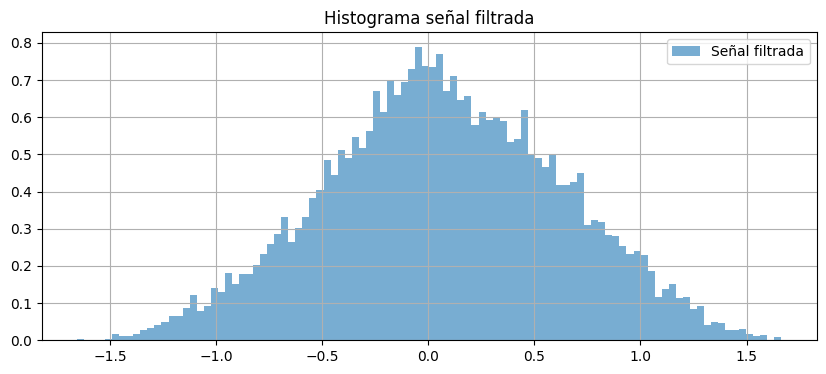

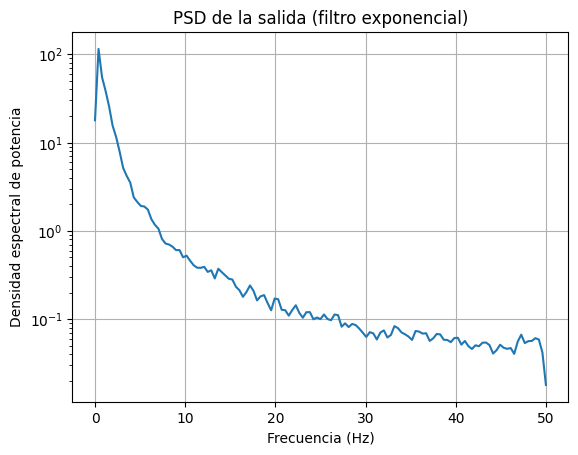

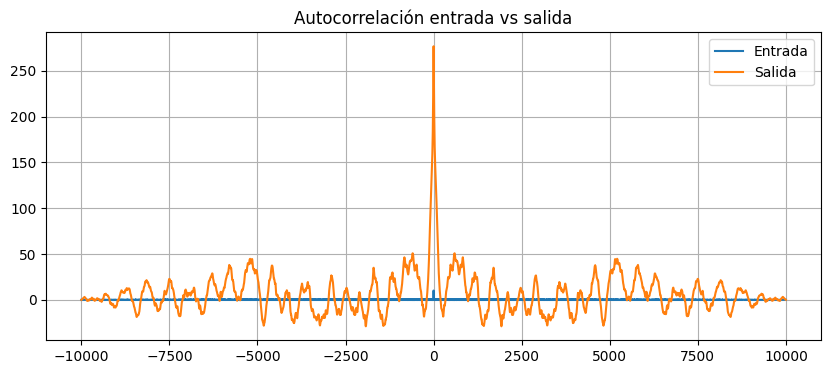

Autocorrelación de entrada R_x[0] = 10.1257
Autocorrelación de salida  R_y[0] = 276.8794


In [24]:
Ruido_Gaussiano(a, G, mean=0.1, varianza=10) # Generar ruido blanco gaussiano

- Como los sistemas LTI preservan la linealidad, la salida también tendrá una media distinta, proporcional a la entrada.
- La forma de la autocorrelación no cambia mucho, pero se desplaza.
- En la PSD puede aparecer un pico en la frecuencia cero (DC), indicando una componente constante
- Aumentar la varianza hace que la señal sea más dispersa o ruidosa.
- Al pasar por el filtro LTI, la energía total (área bajo la PSD) será mayor, ya que depende de la varianza.
- La forma de la autocorrelación se mantiene, pero su amplitud aumenta.

- Los valores alrededor de cero en la autocorrelación nos proporcionan información sobre la estructura temporal de la señal. Si los valores cercanos a cero son altos, eso significa que hay una estructura temporal predecible en la señal, mientras que si son bajos, no hay tal estructura y la señal es más aleatoria o independiente.



**Punto 2**

Media de la funcion X: 0.9975043035801382
Desviacion estandar de la funcion X:  1.9845745217857378


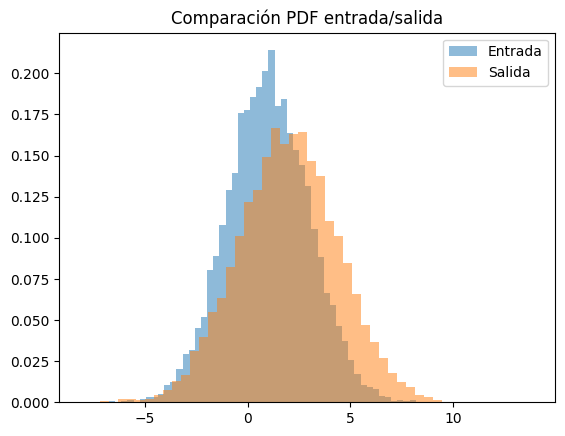

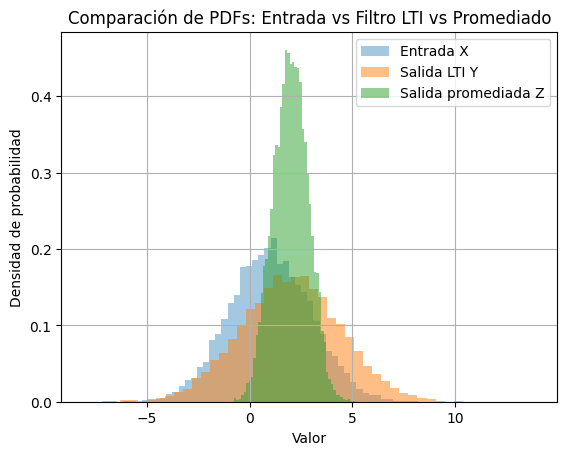


Media x:  0.9975043035801382
Media Y:  1.995055903918043
Media z:  1.9929093997374496

Varianza X:  3.9385360325210894
Varianza Y:  5.841665771042287
Varianza Z:  0.7205325177854836


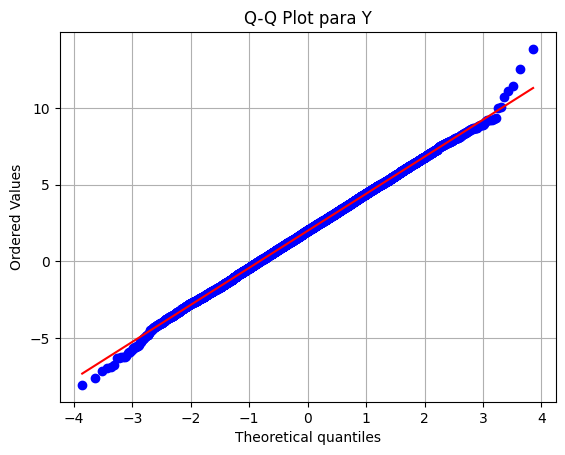

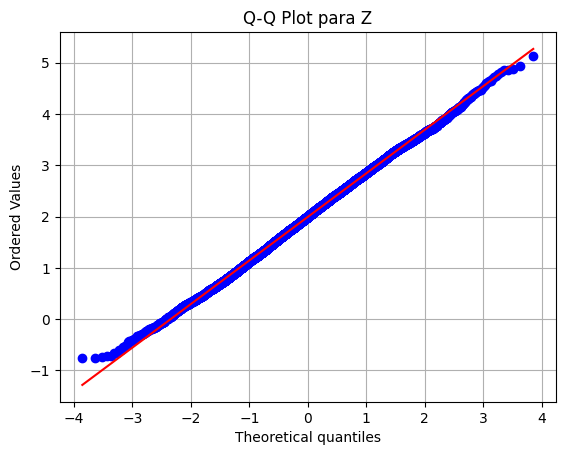

In [25]:
def punto_2(G):
    #1. Generas las muestras X~N(1,2^2), media 1 y desviacion estandar 2
    X = np.random.normal(1, 2, (10000 + G*100))
    #media 1, desviacion estandar  2,  NUMERO DE MUESTRAS 10000 + G(21)*100
    #Desde la libreria "numpy" se puede llamar la funcion random.normal
    #Esta funcion implementada en numpy hace que podamos crear un vector que sea aleatorio y que ademas tenga una distribucion normal

    print("Media de la funcion X:", np.mean(X))
    print("Desviacion estandar de la funcion X: ", np.std(X))
    #Se pueden comprobar que la media y la desviacion, con las funciones np.mean, y np.std
    #--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

    #2. Sistema LTI h[K] = [1/a, 1, 1/a], siendo h[k] la respuesta al impulso
    H = [1/a, 1, 1/a]
    Y = lfilter(H, [1], X)
    #Filtro promedio simple unado la libreria scipy.signal
    #Reduce el ruido usando la media de cada digito con su vecino (izquierda y derecha), haciendo que cada uno de estos tenga menos peso, ya que los multiplicamos por 1/a, como a>1, 1/a<1

    filtro_G_muestras = np.ones(G) / G
    Z = lfilter(filtro_G_muestras, [1], Y)
    #---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


    #3 Grafica de los histogramas
    plt.hist(X, bins=50, density=True, alpha=0.5, label='Entrada')#plt.hist(), grafica la funcion
    plt.hist(Y, bins=50, density=True, alpha=0.5, label='Salida')
    plt.legend()
    plt.title("Comparación PDF entrada/salida")
    plt.show()

    plt.hist(X, bins=50, density=True, alpha=0.4, label='Entrada X')
    plt.hist(Y, bins=50, density=True, alpha=0.5, label='Salida LTI Y')
    plt.hist(Z, bins=50, density=True, alpha=0.5, label='Salida promediada Z')
    plt.legend()
    plt.title("Comparación de PDFs: Entrada vs Filtro LTI vs Promediado")
    plt.xlabel("Valor")
    plt.ylabel("Densidad de probabilidad")
    plt.grid(True)
    plt.show()
    #----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    #Se pueden comprovar las distribuciones de la entrada comparandala con las salidas.
    print("\nMedia x: ", np.mean(X))
    print("Media Y: ",np.mean(Y))
    print("Media z: ",np.mean(Z))
    #Podemos observar como la media al pasar por el sistema LTI se desplazo la señal casi al doble, ya que para el ejemplo como a = 2, tenemos que  1/2 + 1 + 1/2 = 2,
    #y como la salida Z hace el promedio la salida su media seria practicamente igual
    print("\nVarianza X: ", np.var(X))
    print("Varianza Y: ", np.var(Y))
    print("Varianza Z: ", np.var(Z))

    #Para el caso de la varianza se puede ver como al aplicar el sistema LTI aumenta amplifica los valores lo cual aumenta la varianza,
    #y al aplicar el promedio se puede visualizar como suaviza y reduce la dispersion de la señal
    #-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

    #Comprobacion usando Gráfico Q-Q (Quantile-Quantile), comprueba con una distribucion normal, observando la similitud que tienen estas

    stats.probplot(Y, dist="norm", plot=plt)
    plt.title("Q-Q Plot para Y")
    plt.grid()
    plt.show()

    stats.probplot(Z, dist="norm", plot=plt)
    plt.title("Q-Q Plot para Z")
    plt.grid()
    plt.show()

#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

punto_2(G)

¿La salida sigue siendo gaussiana?

La salida del sistema sigue siendo gaussiana, ya que la respuesta de un sistema LTI a una entrada gaussiana es una combinación lineal de variables gaussianas.

Esta propiedad garantiza que la forma de la distribución se conserva
De manera visual podemos se puede decir que si, ya que el histograma tiene la forma de la campana de Gauss, una grafica normal


**Punto 3**

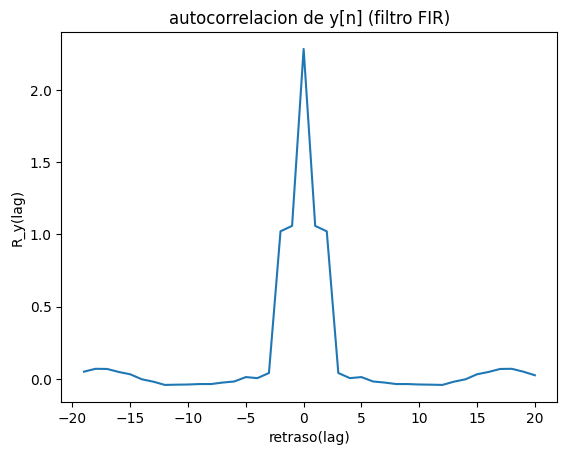

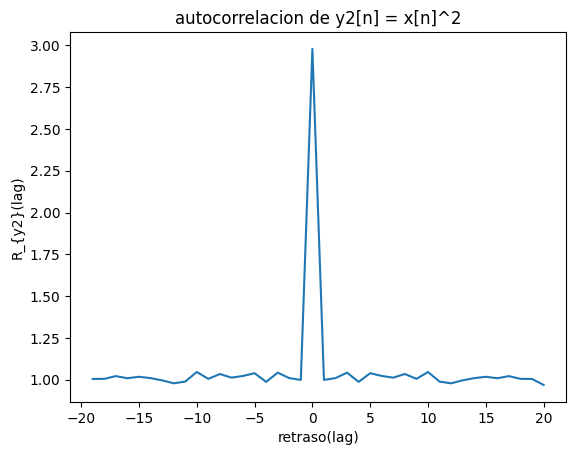

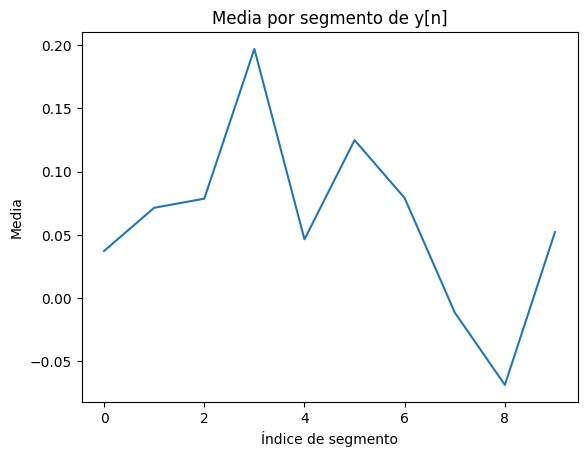

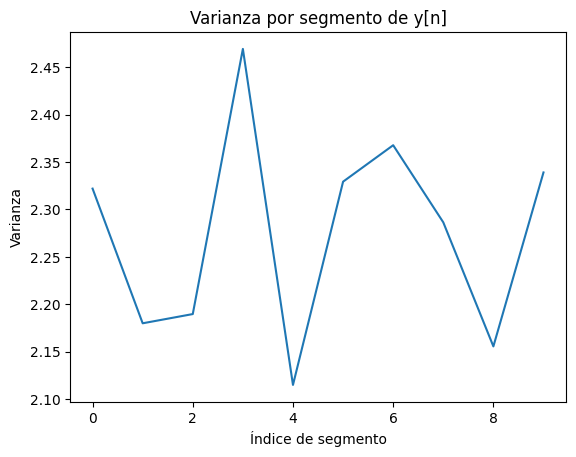

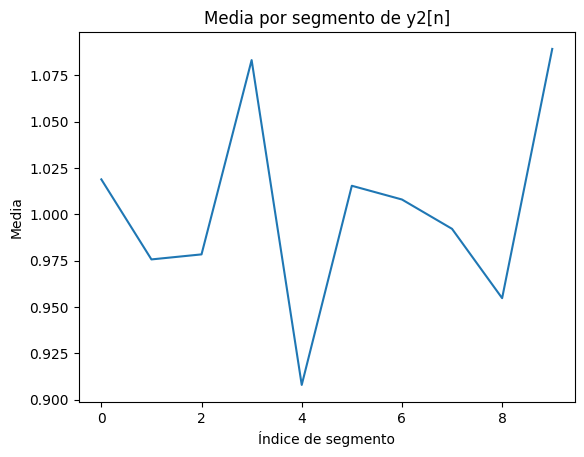

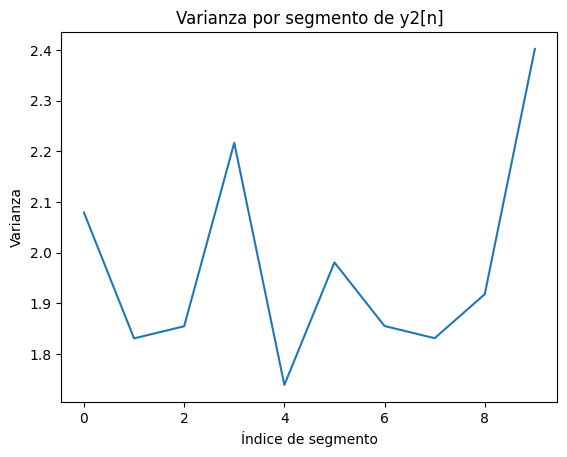

Medias de y por segmento:    [ 0.0373  0.0715  0.0787  0.1971  0.0465  0.125   0.0791 -0.0114 -0.0687
  0.0523]
Varianzas de y por segmento: [2.322  2.18   2.1897 2.4692 2.1151 2.3293 2.3677 2.2864 2.1557 2.339 ]
Medias de y2 por segmento:   [1.0189 0.9757 0.9784 1.0833 0.908  1.0155 1.0081 0.9922 0.9548 1.0893]
Varianzas de y2 por segmento: [2.0794 1.8311 1.855  2.217  1.7393 1.981  1.8555 1.8314 1.9182 2.4022]
media de y[n]: 0.0607, varianza de y[n]: 2.2800
media de y2[n]: 1.0024, varianza de y2[n]: 1.9737


In [20]:


def punto_3(N, a, G, mu_x, sigma_x):
  #1) simulacion de x[k] como ruido blanco gaussiano WSS
  x = np.random.normal(mu_x, sigma_x, N)

  #2) definicion del filtro FIR h[k] = [1,1/a,1/2a]
  h = [1,1/a,1/2*a]


  #3) filtrado de x[k] a traves del FIR
  y = lfilter(h,[1],x) #y[n] = Σ h[k]·x[n-k]

  #4) estadisticas de la señal filtrada y[n]
  mean_y = np.mean(y)
  var_y = np.var(y)

  #5) estimacion de la autocorrelacion de y[n]
  autocorr_y = np.correlate(y,y,mode='full')/len(y)
  lags = np.arange(-len(y)+1,len(y)) #eje x a la hora de graficar las autocorrelaciones

  #6) grafica de la autocorrelacion de y[n]
  plt.figure()
  plt.plot(lags[len(y)-20:len(y)+20], autocorr_y[len(y)-20:len(y)+20])
  plt.title("autocorrelacion de y[n] (filtro FIR)")
  plt.xlabel("retraso(lag)")
  plt.ylabel("R_y(lag)")
  plt.show()

  #7) salida obtenida al aplicar el sistema no lineal (y[n] = x[n]^2)
  y2 = x**2

  #8) estadisticas de la nueva salida (media y varianza)
  mean_y2 = np.mean(y2)
  var_y2 = np.var(y2)

  #9) autocorrelacion de y2[n]
  autocorr_y2 = np.correlate(y2,y2,mode='full')/len(y2)

  plt.figure()
  plt.plot(lags[len(y2)-20:len(y2)+20], autocorr_y2[len(y2)-20:len(y2)+20])
  plt.title("autocorrelacion de y2[n] = x[n]^2")
  plt.xlabel("retraso(lag)")
  plt.ylabel("R_{y2}(lag)")
  plt.show()

  # Parámetros de segmentación
  window_size = 1000 #ventana de segmentacion a 1000 muestras para ver como varia la varianza y la media de y y y2 en distintos segmentos
  num_windows = N // window_size #el total de segmentos que se usaran seran 10, para un total de 10 valores de media y varianza

  # Cálculo de media y varianza por segmento
  means_y   = [np.mean(y[i*window_size:(i+1)*window_size]) for i in range(num_windows)] #calcula la media de y en 10 distintos instantes
  vars_y    = [np.var(y[i*window_size:(i+1)*window_size])  for i in range(num_windows)] #calcula la varianza de y en 10 distintos instantes
  means_y2  = [np.mean(y2[i*window_size:(i+1)*window_size]) for i in range(num_windows)] #calcula la media de y2 en 10 distintos instantes
  vars_y2   = [np.var(y2[i*window_size:(i+1)*window_size])  for i in range(num_windows)] #calcula la varianza de y2 en 10 distintos instantes

  # Plot de medias de y[n]
  plt.figure()
  plt.plot(range(num_windows), means_y)
  plt.title("Media por segmento de y[n]")
  plt.xlabel("Índice de segmento")
  plt.ylabel("Media")
  plt.show()

  # Plot de varianzas de y[n]
  plt.figure()
  plt.plot(range(num_windows), vars_y)
  plt.title("Varianza por segmento de y[n]")
  plt.xlabel("Índice de segmento")
  plt.ylabel("Varianza")
  plt.show()

  # Plot de medias de y2[n]
  plt.figure()
  plt.plot(range(num_windows), means_y2)
  plt.title("Media por segmento de y2[n]")
  plt.xlabel("Índice de segmento")
  plt.ylabel("Media")
  plt.show()

  # Plot de varianzas de y2[n]
  plt.figure()
  plt.plot(range(num_windows), vars_y2)
  plt.title("Varianza por segmento de y2[n]")
  plt.xlabel("Índice de segmento")
  plt.ylabel("Varianza")
  plt.show()

  # Impresión de valores numéricos
  print("Medias de y por segmento:   ", np.round(means_y, 4))
  print("Varianzas de y por segmento:", np.round(vars_y, 4))
  print("Medias de y2 por segmento:  ", np.round(means_y2, 4))
  print("Varianzas de y2 por segmento:", np.round(vars_y2, 4))
  print(f"media de y[n]: {mean_y:.4f}, varianza de y[n]: {var_y:.4f}")
  print(f"media de y2[n]: {mean_y2:.4f}, varianza de y2[n]: {var_y2:.4f}")

N = 10000
mu_x = 0
sigma_x = 1
punto_3(N,a,G,mu_x,sigma_x) #llama a la funcion principal


EXPLICACION:

para que un proceso aleatorio cumpla con la propiedad de estacionariedad en sentido amplio si sus momentos de primer y segundo orden no dependen del tiempo absoluto. en la practica esto significa que:

1. $E[x(t)]=μ_x$ para todo t, es decir, la media no varia con el tiempo

2. la autocorrelacion $R_x(t_1,t_2)=E[x(t_1)x(t_2)]$ debe ser dependiente solo de la diferencia temporal $T=t_2-t_1$ y no del tiempo absoluto. esto garantiza que la varianza tambien sea constante $(Var[X(t)]=R_x(0)-μ_x^2)$

en el codigo se aplico una media constante 0 por comodidad y varianza 1, de la situacion planteada ya sabemos que tratamos con un proceso wss por lo mismo se usa una varianza constante de 1 para generar la señal x[k]

un filtro FIR es un caso de sistema LTI discreto cuya respuesta al impulso dura un numero finito de muestras. se usa en especial un filtro FIR debido a que no requiere de retroalimentacion y si tuviera, esto puede generar que la respuesta al impulso sea infinita.

en el ejercicio se plantea un filtro FIR con coeficientes $[1,1/a,1/2a]$ donde a es la media de los codigos de los tres integrantes del grupo. en este filtro se aplica la señal x[k] que se genero anteriormente. a la hora de declarar el filtro como segundo parametro se entrega un [1], esto debido a que el comando lfilter recibe como parametros los coeficientes del numerador y del denominador del filtro, como la parte del denominador es la que nos genera la realimentacion ponemos este parametro en 1.

al aplicar el filtro se obtiene entonces una salida wss esto debido a las dos razones que se expusieron al comienzo:

1. MEDIA DE Y:

la media de un proceso aleatorio esta dada por:

*   $E[x(t)]=μ_x(t)$

si asumimos que el proceso x(t) se trata de un proceso aleatorio wss, por definicion esta media debe ser constante (es decir, no cambia con el tiempo) por lo tanto se tiene lo siguiente:

*   $E[x(t)]=μ_x$

como queremos aplicar un filtro FIR, por medio de la sumatoria de convolucion se tiene lo siguiente:

* $y[n]=\sum_{k=0}^{N} h[k]x[n-k]$

por dos razones clave la salida de esta operacion seguira siendo wss:

1. la media de la salida sigue siendo constante debido a lo siguiente:

* $\mu_y = E[y(n)]=E[\sum_{k=0}^{N} h[k]x[n-k]]$
 $\sum_{k=0}^{\infty} h[k]E[x[n-k]]$

 como ya sabemos que la media de x no depende de n ni de t, se puede asumir que:

 $E[x[n-k]]=μ_x$
 y reemplazando esto en la ecuacion anterior se tiene que:

 $\mu_y = \sum_{k=0}^{\infty} h[k]\mu_x$

 en esta expresion tanto la sumatoria como la media de x son constantes por lo tanto la salida tendra tambien media constante

2. AUTOCORRELACION DE Y:

la definicion de autocorrelacione esta dada por la siguiente expresion:

 $R_y[n_1,n_2]=E[ y[n_1]y[n_2] ]$

 $R_y[n_1,n_2]=E[ \sum_{k} h[k]x[n_1-k]*\sum_{m} h[m]x[n_2-m] ]$

 $R_y[n_1,n_2]=\sum_{k}\sum_{m}h[k]h[m]E[x[n_1-k]x[n_2-m]]$

 como x es un proceso wss

 $E[x[n_1-k]x[n_2-m]]=R_x((n_2-m)-(n_1-k))=R_x((n_2-n_1)+(k-m))$

 lo que nos dice que la autocorrelacion de x solo depende de el desfase $T=n_2-n_1$ y de los indices k-m, reordenando y reemplazando en la ecuacion principal se tiene:

 $R_y[T]=\sum_{k}\sum_{m}h[k]h[m]R_x(T+k-m)$

 la cual es una funcion unicamente dependiende de T. por lo tanto se ve que y cumple ambas condiciones y se desmuestra que obtendremos tambien una salida wss.

 para el caso de la salida no lineal $y=x[n]^2$, se tiene lo siguiente:

ANALISIS DE Y2:

 1. MEDIA:

  se define $\mu_y(n) = E[y(n)]=E[x(n)^2]$
  como x es wss,$E[x(n)^2]$ es identico para todo n

  partiendo de la definicion de varianza se tiene lo siguiente:

  $Var[x(n)]=E[(x(n)-\mu_x)^2]$

  donde $\mu_x=E[x(n)]$ debido a que se trata de un proceso con wss y media constante, como ya se demostro antes al tratarse de esta misma propiedad, la varianza de x(n) tambien es constante

  expandiendo el cuadrado se tiene:

  $Var[x(n)] = E[x^2-2\mu_xx+\mu_x^2]$
  $Var[x(n)] = E[x(n)^2]-2\mu_xE[x(n)]+\mu_x^2$

  $Var[x(n)]=E[x(n)^2]-2\mu_x^2+\mu_x^2$

  $Var[x(n)]=E[x(n)^2]-\mu_x^2$

  despejando entonces la esperanza de y(n) se tiene:

  $E[x(n)^2]=Var[x(n)]+\mu_x^2$

  como Var[x(n)] es constante se concluye entonces que la esperanza o media de y tambien es constante

2. AUTOCORRELACION DE Y2:
  
  definiendo

  $R_y[n_1,n_2] = E[y(n_1)y(n_2)]=E[x(n_1)^2x(n_2)^2]$

  al tratarse de un proceso gaussiano de cuarto orden se hace uso del teorema de isserlis para reducirlo a combinaciones de momentos de segundo orden:

  en primer lugar se definen los momentos:
  $x_1 = x[n_1], x_2 = x[n_1], x_3 = x[n_2], x_4 = x[n_2]$

  ahora se hacen particiones pares con posibles combinaciones de pares disjuntos entre estos momentos, para unproceso de 4 orden hay 3 combinaciones posibles:

  * $[x_1,x_2] y [x_3,x_4]$
  * $[x_1,x_3] y [x_2,x_4]$
  * $[x_1,x_4] y [x_2,x_3]$

  para continuar se hace la productoria de cada combinacion par planteada. segun isserlis, cada particion contribuye con el producto de las esperanzas de cada par:

  primera particion:
  * $E[x_1,x_2]*E[x_3,x_4] = E[x(n_1)x(n_1)]*E[x(n_2)x(n_2)]=R_x(0)*R_x(0)$

  en este caso la contribucion no depende de T debido a que se esta tomando la autocorrelacion en el mismo instante de tiempo, al hacer la diferencia temporal T = 0

  segunda particion:
  * $E[x_1,x_3]*E[x_2,x_4] = E[x(n_1)x(n_2)]*E[x(n_1)x(n_2)]=R_x(T)*R_x(T)$

  tercera particion:
  * $E[x_1,x_4]*E[x_2,x_4] = E[x(n_1)x(n_2)]*E[x(n_1)x(n_2)]=R_x(T)*R_x(T)$

  como ultimo paso se hace la suma de las contribuciones

  $E[x_1x_2x_3x_4]=R_x(0)R_x(0)+R_x(T)R_x(T)+R_x(T)R_x(T)$

  $E[x_1x_2x_3x_4]=R_x(0)^2+2R_x(T)^2$

  en el codigo se añadieron lineas en las que se intenta demostrar que la media es constante para asi verificar desde el codigo la primer condicion. los resultados muestran que la media se mantiene en un rango de valores que no varian mucho y no siguen una tendencia especifica, estas variaciones se deben a la propia naturaleza aleatoria de x.



















**Punto 4**

In [21]:


def simular_dispersion(f_dispersion):

    # Parámetros:
    A=10000 # A: número de muestras
    # f_dispersion: arreglo que representa el filtro dispersivo (FIR)

    # Generar ruido blanco gaussiano (media 0, varianza 1)
    x = np.random.normal(0, 1, A)


    # Aplicar filtro de dispersión
    y_disp = np.convolve(x, f_dispersion, mode='same')

    # Autocorrelación
    autocorr = correlate(y_disp, y_disp, mode='full') / A
    lags = np.arange(-A + 1, A)

    plt.figure(figsize=(10,4))
    plt.plot(lags, autocorr)
    plt.title("Autocorrelación con dispersión")
    plt.xlabel("Desfase")
    plt.ylabel("R(τ)")
    plt.grid()
    plt.tight_layout()
    plt.show()

    # PSD
    f, Pxx = welch(y_disp, fs=100)
    plt.figure(figsize=(10,4))
    plt.semilogy(f, Pxx)
    plt.title("PSD con dispersión")
    plt.xlabel("Frecuencia (Hz)")
    plt.ylabel("Densidad espectral de potencia")
    plt.grid()
    plt.tight_layout()
    plt.show()

    # valor de autocorrelacion en 0
    idx0 = len(autocorr) // 2
    print(f"Autocorrelación R[0] = {autocorr[idx0]:.4f} (potencia total)")


Dispersion con filtro leve


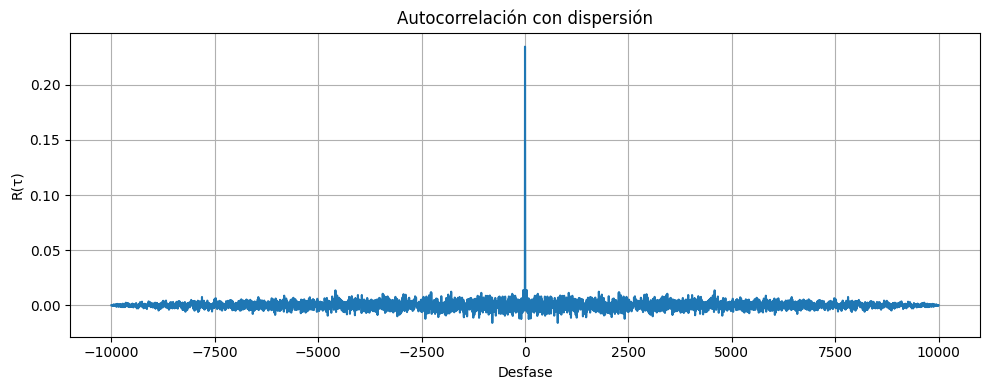

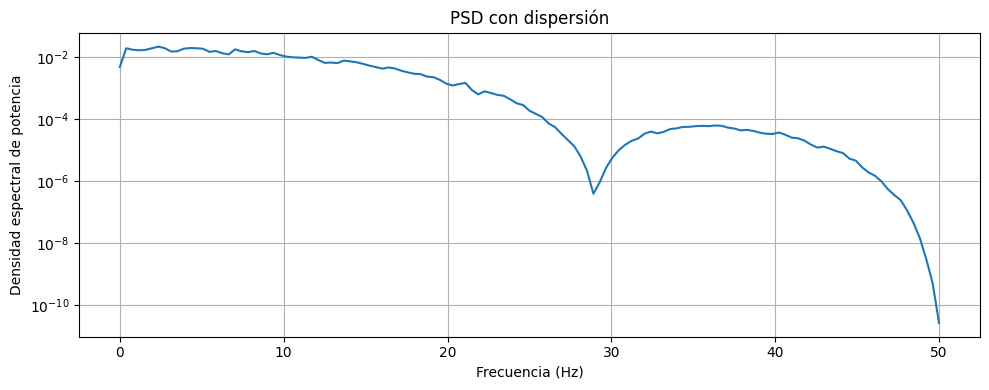

Autocorrelación R[0] = 0.2347 (potencia total)
Dispersión con filtro moderado


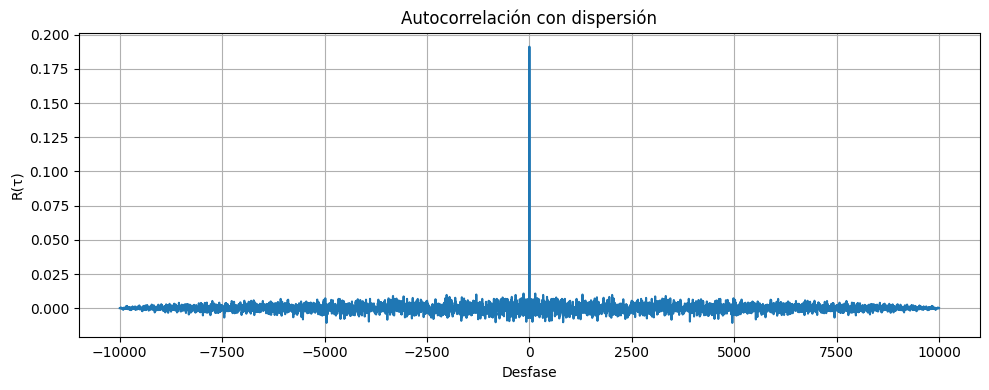

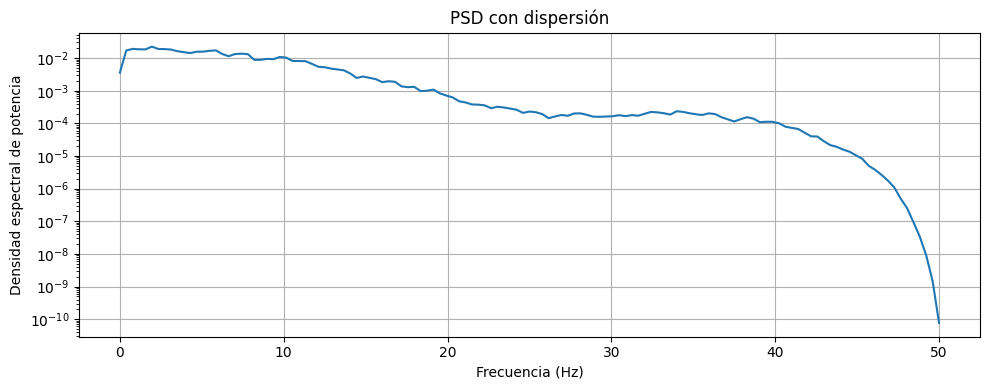

Autocorrelación R[0] = 0.1912 (potencia total)
Dispersión con filtro gaussiano


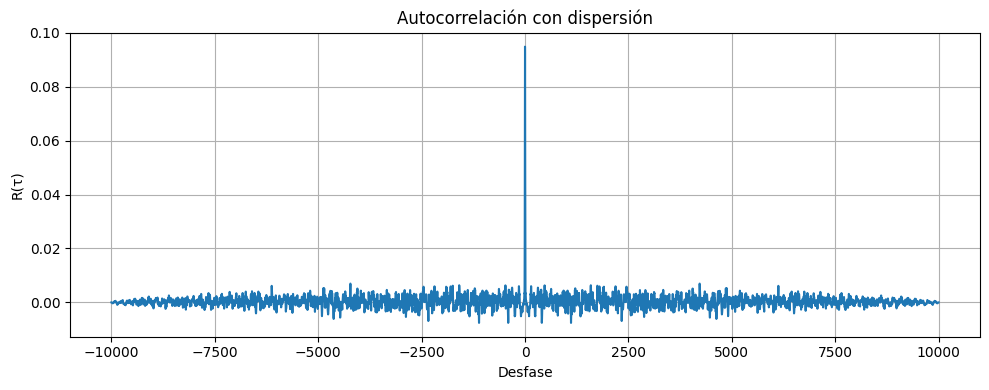

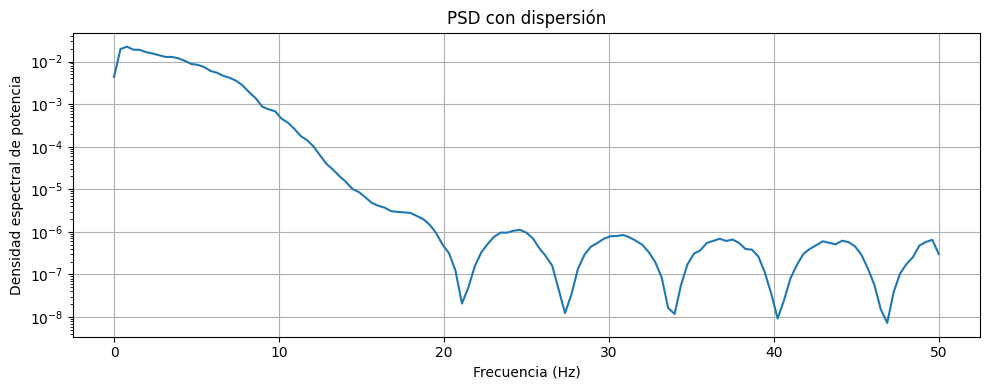

Autocorrelación R[0] = 0.0949 (potencia total)
Dispersión con filtro cola


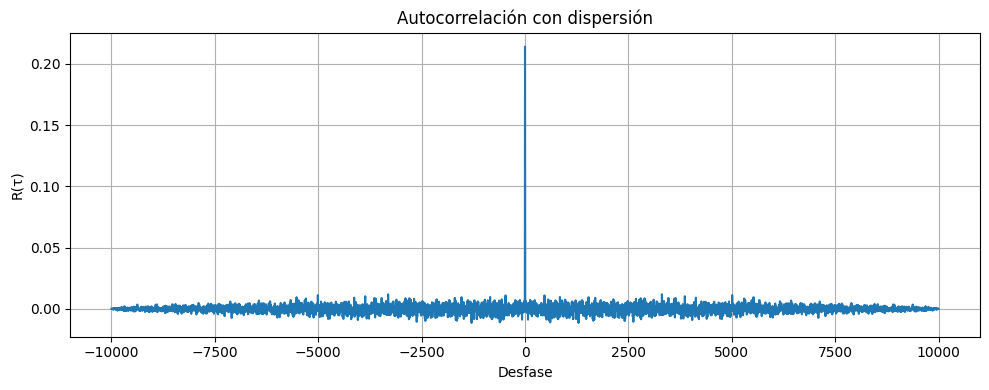

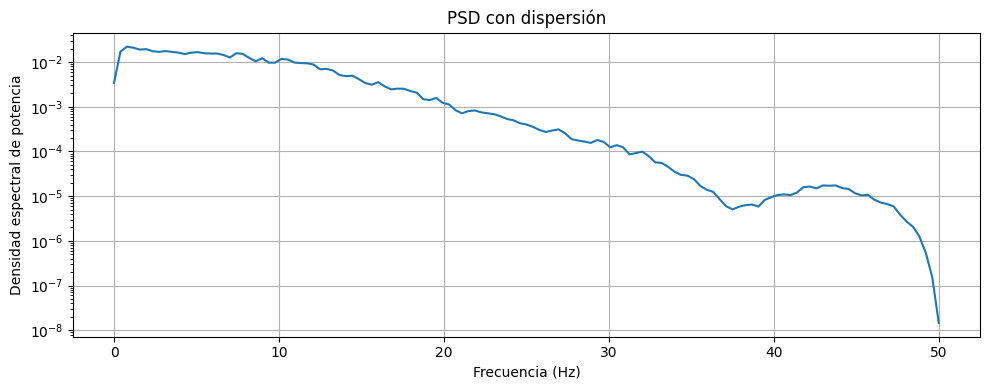

Autocorrelación R[0] = 0.2141 (potencia total)
Dispersión con filtro pasa bajas promedio


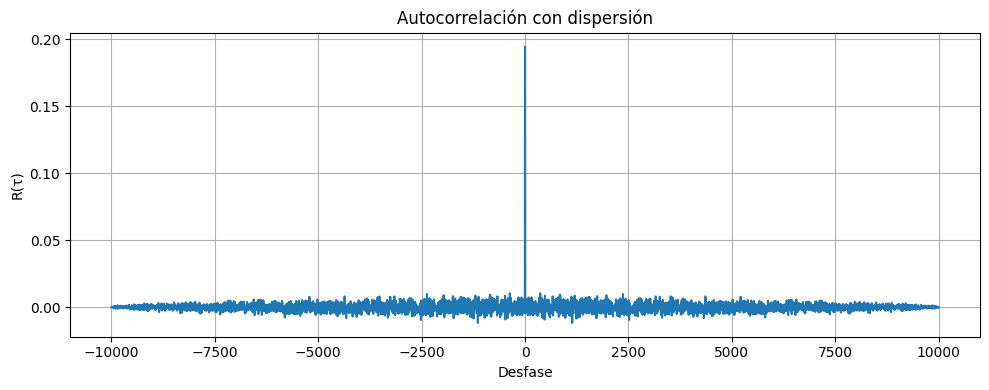

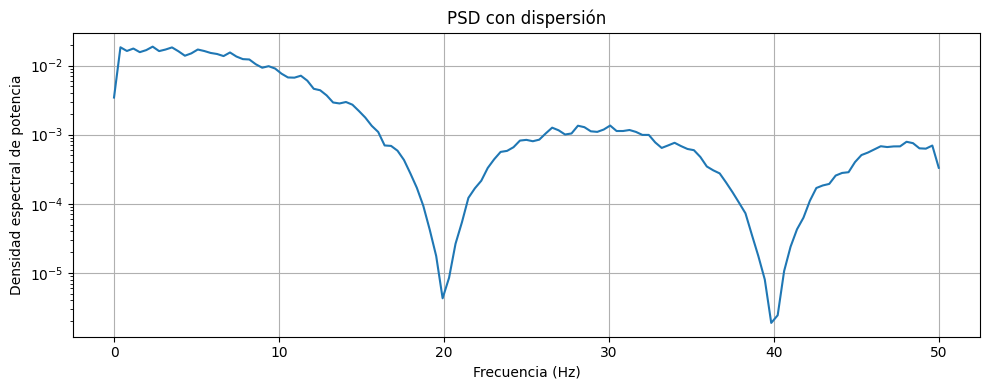

Autocorrelación R[0] = 0.1944 (potencia total)


In [22]:
# Filtro simétrico tipo campana: simula una dispersión leve y centrada.
filtro_leve = [0.1, 0.25, 0.3, 0.25, 0.1]

# Filtro simétrico más extendido: representa una dispersión moderada en el tiempo.
filtro_moderado = np.array([0.05, 0.1, 0.2, 0.3, 0.2, 0.1, 0.05])

# Filtro gaussiano normalizado: simula la dispersión real observada en fibra óptica.
L, std = 15, 3.0
t = np.linspace(-(L-1)/2, (L-1)/2, L)
filtro_gaussiano = np.exp(-0.5*(t/std)**2)
filtro_gaussiano /= filtro_gaussiano.sum()

# Filtro asimétrico tipo cola: simula una dispersión retardada en el tiempo (cola prolongada).
filtro_cola = [0.05, 0.1, 0.2, 0.3, 0.25, 0.1]

# Filtro pasa bajas promedio: atenúa altas frecuencias y simula un ensanchamiento básico.
filtro_pasabajas = np.ones(5) / 5



print("Dispersion con filtro leve")
simular_dispersion(filtro_leve)
print("Dispersión con filtro moderado")
simular_dispersion(filtro_moderado)
print("Dispersión con filtro gaussiano")
simular_dispersion(filtro_gaussiano)
print("Dispersión con filtro cola")
simular_dispersion(filtro_cola)
print("Dispersión con filtro pasa bajas promedio")
simular_dispersion(filtro_pasabajas)



La dispersión cromática en fibras ópticas provoca que diferentes componentes espectrales de un pulso de luz se propaguen a distintas velocidades, causando el ensanchamiento del pulso en el tiempo. Para modelar este fenómeno, se utiliza un filtro con respuesta al impulso exponencial decreciente, que representa la dispersión temporal introducida por la fibra. Al aplicar este filtro a una señal de ruido blanco gaussiano, se observa un cambio en la densidad espectral de potencia (PSD) y en la autocorrelación de la señal, reflejando el efecto de la dispersión cromática.
